# Hypothesis:

Students who are Computer Science Major will think the course is moving more slowly than those who did not take it.

In [1]:
__author__ = "730369129"

%reload_ext autoreload
%autoreload 2

### First, I will read in the csv and convert it to a column-oriented data table.

In [5]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

## Next, I will select just the section column. Here are the first five rows:

In [18]:
from data_utils import head, select
subset: dict[str, list[str]] = select(columns, ["comp_major"])
print(head(subset, 50))
subset_2: dict[str, list[str]] = select(columns, ["pace"])
head(subset_2, 5)

{'comp_major': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes - Minor', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes - BS', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']}


{'pace': ['5', '5', '5', '6', '5']}

### Next I will count up the totals of each.

In [21]:
from data_utils import count
counts = count(subset['comp_major'])
from data_utils import count_non_majors
counts_nonmajors = count_non_majors(subset['comp_major'])

print(f"Total of comp majors: {counts['Yes - BS']} BS + {counts['Yes - BA']} BA")
print(f"Total of non-comp majors: {counts_nonmajors}")

Total of comp majors: 88 BS + 48 BA
Total of non-comp majors: 437


### Next, I will find the average pace for comp majors vs. non-comp majors.

In [31]:
def average_major(xs: dict[str, list[str]]) -> dict[str, float]:
    result_sum: dict[str, int] = {}
    result_sum['No'] = 0
    result_sum['Yes'] = 0
    result_count: dict[str, int] = {}
    result_count['No'] = 0
    result_count['Yes'] = 0
    i: int = 0
    while i < len(xs['comp_major']):
        if xs['comp_major'][i] == 'No':
            result_sum['No'] = result_sum['No'] + int(xs['pace'][i])
            result_count['No'] = result_count['No'] + 1
        if xs['comp_major'][i] == 'Yes - minor':
            result_sum['No'] = result_sum['No'] + int(xs['pace'][i])
            result_count['No'] = result_count['No'] + 1
        if xs['comp_major'][i] == ('Yes - BS' or 'Yes - BA'):
            result_sum['Yes'] = result_sum['Yes'] + int(xs['pace'][i])
            result_count['Yes'] = result_count['Yes'] + 1
        i += 1

    result_dict: dict[str, float] = {}
    for key in result_sum:
        result_dict[key] = result_sum[key] / result_count[key]  

    return result_dict

In [32]:
subset_3: dict[str, list[str]] = select(columns, ["comp_major","pace"])
head(subset_3,10)

average_major(subset_3)

{'No': 5.4727722772277225, 'Yes': 4.681818181818182}

## Make graphs

In [33]:
def major_splitter(xs: dict[str, list[str]]) -> dict[str, list[str]]:
    result: dict[str, list[str]] = {}
    result['No'] = []
    result['Yes'] = []
    i: int = 0
    while i < len(xs['comp_major']):
        if xs['comp_major'][i] == 'No':
            result['No'].append(xs['pace'][i])
        if xs['comp_major'][i] == 'Yes - minor':
            result['No'].append(xs['pace'][i])
        if xs['comp_major'][i] == ('Yes - BS' or 'Yes - BA'):
            result['Yes'].append(xs['pace'][i])
        i += 1

    
    return result

In [34]:
major_values = major_splitter(subset_3)
no_vals = count(major_values['No'])
yes_vals = count(major_values['Yes'])

<BarContainer object of 7 artists>

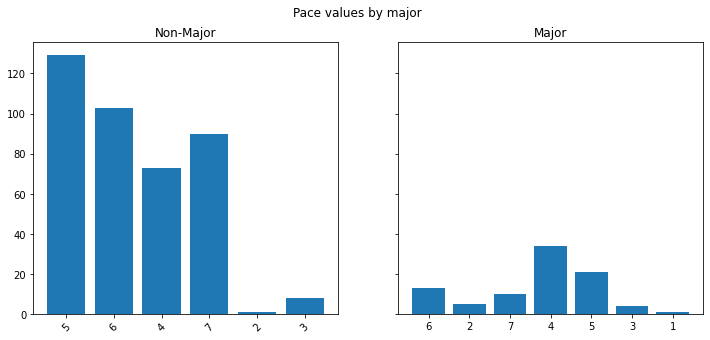

In [35]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Pace values by major")



axes[0].set_title("Non-Major")
axes[0].bar(no_vals.keys(), no_vals.values())
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("Major")
axes[1].bar(yes_vals.keys(), yes_vals.values())

# Conclusion

In conclusion, the average 'pace' value for non-Comp Sci majors is higher than those that are Comp Sci majors, implying Comp Sci majors think that the pace is slower than those that aren't Comp Sci majors. 